<a href="https://colab.research.google.com/github/laperez/Phyton/blob/master/Sesion_04_Iniciacion_a_Matplotlib_y_Bokeh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Enlace](https://drive.google.com/uc?export=view&id=1N_Cf8b0OVNbFMd5lmNvlhY98X6liuTZh)

**Contenido:**


1. Matplotlib
2. Bokeh
3. Ejercicio



# **Matplotlib**

Matplotlib es la librería de representación gráfica básica dentro de Python.

La web principal de la librería es:
https://matplotlib.org/#

La dirección para consulta de la API está en:
https://matplotlib.org/api/index.html

La guía de usuario (que puede descargarse en PDF) se encuentra en:
https://matplotlib.org/users/index.html (https://matplotlib.org/Matplotlib.pdf)

Una cheat sheet (versión resumida para consulta de funcionalidades aparece en):
https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf

Libro Matplotlib Mastering:
https://buscaenbuja.ujaen.es/permalink/34CBUA_UJA/df6b9e/alma991003847611604994

Libro Matplotlib cookbook:
https://buscaenbuja.ujaen.es/permalink/34CBUA_UJA/df6b9e/alma991004029093004994



## Importación de matplotlib

In [ ]:
#
# Matplotlib tiene una importación algo diferente. La clase fundamental no está
# en el paquete raíz.
# De forma general siempre se utiliza un álias para simplificar el acceso
#
# Matplotlib
import matplotlib.pyplot as plt

## Importación de los accesos a Google Drive para lectura/grabación

In [ ]:
# Conexión de archivos con Google drive
from google.colab import drive
# Montaje de la unidad (el directorio indica el punto de montaje y siempre será '/content/...')
drive.mount('/content/drive', force_remount=True)
# Además vamos a poner el directorio por defecto para el resto del notebook
dirDef = '/content/drive/My Drive/CursoPythonCEATIC/Curso2020/20200707_0900_Introduccion_a_Pandas/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Lectura de la información
Vamos a usar los datos del ejemplo de Pandas junto con los datos de la Carta Digital del Mundo

In [ ]:
# Vamos a cargar los datos, unirlos, crear un campo de fecha con el tipo de clase
# adecuada y luego filtraremos para dejar sólo algunas de las columnas
import pandas as pd
# Preparación:
# Leemos los datos de ambas tablas y las unimos
# Creamos el campo de la fecha
# Dejamos sólo algunos de los campos, concretamente:
# fecha, cases, deaths, countriesAndTerritories, geoId, countryterritoryCode, popData2019, continentExp, Longitude, Latitude, economy, income_grp, gdp_year, gdp_md_est
datosCSV = pd.read_csv(dirDef + 'COVID-19_opendata_ecdc_europa_20200704.csv')
paises = pd.read_excel(dirDef + 'country_centroids_az8.xls')
datosCSV['fecha'] = datosCSV.apply(lambda f: pd.Timestamp(f['year'], f['month'], f['day']), axis=1)
datosCSVP = pd.merge(datosCSV, paises, how='left', left_on='countryterritoryCode', right_on='iso_a3')
datosCSVPF = datosCSVP[['fecha', 'cases', 'deaths', 'countriesAndTerritories', 'geoId', 'countryterritoryCode', 'popData2019', 'continentExp', 'Longitude', 'Latitude', 'economy', 'income_grp', 'gdp_year', 'gdp_md_est']]
datosCSVPF

,fecha,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Longitude,Latitude,economy,income_grp,gdp_year,gdp_md_est
0,2020-07-04,302,12,Afghanistan,AF,AFG,38041757.0,Asia,66.004734,33.835231,7. Least developed region,5. Low income,-99.0,22270.0
1,2020-07-03,186,33,Afghanistan,AF,AFG,38041757.0,Asia,66.004734,33.835231,7. Least developed region,5. Low income,-99.0,22270.0
2,2020-07-02,319,28,Afghanistan,AF,AFG,38041757.0,Asia,66.004734,33.835231,7. Least developed region,5. Low income,-99.0,22270.0
3,2020-07-01,279,13,Afghanistan,AF,AFG,38041757.0,Asia,66.004734,33.835231,7. Least developed region,5. Low income,-99.0,22270.0
4,2020-06-30,271,12,Afghanistan,AF,AFG,38041757.0,Asia,66.004734,33.835231,7. Least developed region,5. Low income,-99.0,22270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27617,2020-03-25,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,29.851441,-19.004204,5. Emerging region: G20,5. Low income,0.0,9323.0
27618,2020-03-24,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,29.851441,-19.004204,5. Emerging region: G20,5. Low income,0.0,9323.0
27619,2020-03-23,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,29.851441,-19.004204,5. Emerging region: G20,5. Low income,0.0,9323.0
27620,2020-03-22,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,29.851441,-19.004204,5. Emerging region: G20,5. Low income,0.0,9323.0


In [ ]:
# Recordatorio (creación de multiíndices y eliminación)
# Crear multiindex por Continente y País. Luego acceder a las filas de China en Asia
temp_datosCSVPF = datosCSVPF.set_index(['continentExp', 'countriesAndTerritories'])
temp_datosCSVPF.loc['Asia','China']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  after removing the cwd from sys.path.


fecha  cases  ...  gdp_year gdp_md_est
continentExp countriesAndTerritories                    ...                     
Asia         China                   2020-07-04      9  ...     -99.0  7973000.0
             China                   2020-07-03     14  ...     -99.0  7973000.0
             China                   2020-07-02     31  ...     -99.0  7973000.0
             China                   2020-07-01      5  ...     -99.0  7973000.0
             China                   2020-06-30     23  ...     -99.0  7973000.0
...                                         ...    ...  ...       ...        ...
             China                   2020-01-04      0  ...     -99.0  7973000.0
             China                   2020-01-03     17  ...     -99.0  7973000.0
             China                   2020-01-02      0  ...     -99.0  7973000.0
             China                   2020-01-01      0  ...     -99.0  7973000.0
             China                   2019-12-31     27  ...     -99.0  7973000.0

[187 rows x 12 columns]

Resultado esperado (parcial):

![Resultado](https://drive.google.com/uc?id=1H3Qw0AYnCy7quT6T_cjtbY-EoQ_ImZ-L)

In [ ]:
# Resetear los indices y acceder a la fila 0
temp_datosCSVPF2 = temp_datosCSVPF.reset_index()
temp_datosCSVPF2.loc[0]

continentExp                                    Asia
countriesAndTerritories                  Afghanistan
fecha                            2020-07-04 00:00:00
cases                                            302
deaths                                            12
geoId                                             AF
countryterritoryCode                             AFG
popData2019                              3.80418e+07
Longitude                                    66.0047
Latitude                                     33.8352
economy                    7. Least developed region
income_grp                             5. Low income
gdp_year                                         -99
gdp_md_est                                     22270
Name: 0, dtype: object

Resultado esperado:

![Resultado](https://drive.google.com/uc?id=1IA9_3YXmTA2u00pZ3geZScFCaJkSParX)

## Breve descripción de los tipos de gráficas
Matplotlib posee un gran número de gráficas que pueden ser útiles para diferentes aplicaciones. Todas las imágenes que ahora se muestran han sido extraidas de: https://matplotlib.org/gallery/index.html excepto la imagen 3D que ha sido creada para el curso. A continuación se hace una breve descripción, discutible pero muy práctica, sobre cada uno de los diferentes tipos.

Los gráficos tienen diferentes aplicaciones y usos. El más extendido es el gráfico de barras que permite representar valores cualitativos respecto de sus respectivo valores cuantitativos, como en el ejemplo siguiente:
<center><img src='https://matplotlib.org/_images/sphx_glr_bar_stacked_001.png' width=500></center>

Donde se representan los valores de diferentes grupos (G1 a G5 que son elementos cualitativos) respecto de sus puntuaciones.

También existen otro tipo de gráficas donde se incluyen huecos (gaps) entre los valores cuantitativos. Este tipo de gráficas son muy interesante para la realización de cronogramas, tablas de tiempos e incluso diagramas de GANTT:

<center><img src='https://matplotlib.org/_images/sphx_glr_broken_barh_001.png' width=500></center>

Otro tipo de gráficas muy empleadas son las gráficas de líneas, en este tipo de gráficos los elementos del eje X se suelen corresponder con valores cuantitativos (o como mucho ordinales). Este tipo de gráficas suele tener el tiempo como aspecto fundamental como en la siguiente:

<center><img src='https://matplotlib.org/_images/sphx_glr_cohere_001.png' width=500></center>

Otro tipo de gráficos es el de figuras. Matplotlib permite crear figuras de diferente tipo en los gráficos lo que sirve para conjugar esa entrada con otros elementos propios de nuestra representación. Por ejemplo una gráfica lineal y una superficie, u otros aspectos. Un ejemplo de gráfico superficial relleno es:

<center><img src='https://matplotlib.org/_images/sphx_glr_fill_001.png' width=500></center>


Un gráfico comunmente usado es el gráfico de tarta o gráfico circular. Este gráfico es dificil de analizar y complejo de usar porque da lugares a muchas confusiones ya que lo que representa es una valor relativo de los datos por lo que sólo se aconseja su uso en datos con un eje cualitativo y que el otro eje cuantitativo esté relativizado entre todos los elementos (como el porcentaje que se encuentra en el ejemplo).

<center><img src='https://matplotlib.org/_images/sphx_glr_pie_features_001.png' width=500></center>

Un gráfico con un aspecto similar pero con usos completamente diferente es el gráfico polar. En él la variable principal representa un valor circular que se repite y la variable dependiente es un valor cuantitativo que indica algún aspecto de esa referencia circular. Un ejemplo muy claro son los gráficos de potencia de señal de antenas, pero pueden usarse con otros fines como gráficos de situación relativa de elementos, gráficos de relaciones respecto de un punto, etc.

<center><img src='https://matplotlib.org/_images/sphx_glr_polar_bar_001.png' width=500></center>

Otro tipo de gráfico son los escaterogramas (scatter). Originalmente se diseñaron para ser usados como gráfico de correlación entre dos variables cualitativas, es decir, permiten determinar si una variable es dependiente de la otra y en qué medida. Además, alternando ejes lineales, logaritmicos y exponenciales se puede visualizar si la relación es de diferentes tipos. Un ejemplo de este tipo de gráficos es el que se muestra en la siguiente figura, notar que se ha incluido una variable cuantitativa más que se representa como una variación en tamaño de los círculos:

<center><img src='https://matplotlib.org/_images/sphx_glr_scatter_demo2_001.png' width=500></center>

Un gráfico como el anterior puede ser compuesto con gráficos de barras para dar información sobre el histograma, y por lo tanto distribución de cada una de las variables individuales:

<center><img src='https://matplotlib.org/_images/sphx_glr_scatter_hist_001.png' width=500></center>

Un uso particular de las anotaciones y otros aspectos denominados 'artist' del matplotlib permiten crear elementos tan interesantes como las líneas temporales que se muestran en el ejemplo.

<center><img src='https://matplotlib.org/_images/sphx_glr_timeline_001.png' width=500></center>

Los diagramas que representan resultados estadísticos son también altamente recomendables para el análisis de series de variables. En estos gráficos, se representa cada serie en una fila con los siguientes elementos:
1. El valor mediano aparece marcado cerca del lugar central de la caja.
2. La caja viene definida por los límites del cuartil 1 y 3 (Q1 y Q3).
3. Los "bigotes" o líneas horizontales que se extienden a un valor por defecto de 1.5(Q3-Q1). De forma que el bigote superior es Q3+1.5(Q3-Q1) y el inferior Q1-1.5(Q3-Q1). El valor de 1.5 puede ser modificado e incluso si se activa 'range', los bigotes representan el valor máximo y mínimo.
4. Los valores outliers (o "muy diferentes" de la serie) vienen marcados fuera de los "bigotes" como pequeños circulos.

En la siguiente imagen se muestra un ejemplo de esta representación con boxplot. La diferencia entre el gráfico a la izquierda y la derecha es que se aplica una caja que se encoje en la mediana en función de la confianza en el valor.

<center><img src='https://matplotlib.org/_images/sphx_glr_boxplot_color_001.png' width=500></center>

Como se ha comentado, otro de los aspectos es la representación de diagramas de correlación (scatter) usando los valores de confianza en cada eje mediante su representación en elipses relativas a parámetros como por ejemplo al desviación estándar de los valores). En el siguiente gráfico se muestra un ejemplo:

<center><img src='https://matplotlib.org/_images/sphx_glr_confidence_ellipse_001.png' width=500></center>

Otra representación de interés son los diagramas que representan flujos o movimientos. Éstos pueden ser aplicados a diferentes elementos como el caso que se muestra. También puede aplicarse a otros aspectos como migraciones, desplazamientos de capitales, etc.

<center><img src='https://matplotlib.org/_images/sphx_glr_plot_streamplot_001.png' width=500></center>


También se incluyen en matplotlib la representación 2.5 de variables continuas en el espacio a partir de puntos de muestra tanto alineados como sin alinear. La mayor parte de estas representaciones se basan en el empleo de isocurvas o de coloreado con variación en el valor cromático para representar los cambios en la variación de la variable interpolada:

<center><img src='https://matplotlib.org/_images/sphx_glr_irregulardatagrid_001.png' width=500></center>

Un tipo de gráfico particular y que es de gran utilidad es la representación de elementos matriciales. Estos elementos pueden ser de diferentes tipos. Como ejemplo se muestra la siguiente imagen en la que matplotlib permite realizar transformaciones afines para variar escalas, rotaciones y origen:

<center><img src='https://matplotlib.org/_images/sphx_glr_affine_image_001.png' width=500></center>

Un aspecto muy interesante de la representación en forma matricial es el uso de mapas de calor, pero no como imagen representativa de concentraciones de variables/distancias, si no como relación entre dos variables cualitativas y su interacción entre valores:

<center><img src='https://matplotlib.org/_images/sphx_glr_image_annotated_heatmap_001.png' width=500></center>

Otro de los elementos a tener en cuenta es que matplotlib permite que su canvas de representación se ajuste a algún tipo de proyección cartográfica, lo que nos permite modificar la representación de variables espaciales de una forma más sencilla (eso sí, siempre en latitud y longitud):

<center><img src='https://matplotlib.org/_images/sphx_glr_geo_demo_001.png' width=500></center>

Para terminar los tipos de gráficos que pueden usarse en matplotlib, los aspectos 3D se pueden representar a través de las mallas y alturas (2.5D). A continuación se puede ver una zonas de un modelo de elevaciones (elaboración propia):

<center><img src='https://drive.google.com/uc?id=1Q4_tLakTOFZxCEgYuv6EVBQDaQgpwyCz' width=500></center>


## Introducción
La clase principal de matplotlib es Figure (https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure)

Una figura puede contener varias gráficas, ejes, etc. En la siguiente imagen se pueden ver los elementos principales de una figura con una única gráfica:

<center><img src='https://matplotlib.org/_images/anatomy.png' width=60% alt='Elementos de un gráfico de Matplotlib'>

Fuente: https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py</center>

Los ejes (Axes) son el espacio donde se presenta la gráfica, que se separan en objetos de la clase Axis (un sólo eje) que indican los límites de representación para esa dimensión del gráfico.

Tanto el concepto de Figure como el de Axes son extremadamente relevantes en la creación de cualquier gráfico, ya que la Figure es el contenedor general y el Axes es el particular de cada gráfico ya que se pueden reutilizar los Axes para integrar varias tipologías de gráficas dentro del mismo diagrama.

La entrada de los gráficos puede se:
1. Datos directos: Dos vectores representando los valores X,Y (aunque el Y se pueda repetir varias veces).
2. Datos desde Numpy: Los vectores anteriores pero en formato de matriz de Numpy
3. Datos desde Pandas: Como se vió en la sesión anterior se pueden representar (plot) elementos desde Pandas o extraerlas usando el atributo ***values*** de Pandas para convertirlo a una matriz Numpy y nos encontraríamos en el caso 2.

Las figuras son generalmente 2D, pero las nuevas versiones de Matplotlib soportan figuras 3D y provinientes de imágenes.

## Primer ejemplo
La creación de un gráfico se inicia siempre con la creación de una clase **figure**. Cada objeto tiene asignado un identificador único para cada sesión, lo que implica que si se le asigna uno (puede ser un número o un texto) y ya existía nos devolverá la referencia al objeto, si no es así devolverá una nueva figura.

La creación de una figura puede hacerse:
1. Llamando directamente al constructor con una indicación opcional del identificador (si es texto también servirá de título). Después será necesario añadir Axes a la figura para tener zonas de representación.
2. Llamando a la creación mediante **subplots** que permite crear 1 o varios diagramas con una estructura definida. Esta solución devuelve tanto la figura como un eje seleccionado por identificador o el primer eje.

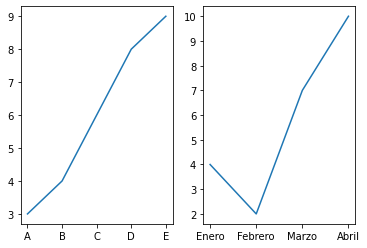

In [ ]:
# Veamos un ejemplo con datos directos
# Crearemos una figura con dos gráficos
datos1x, datos1y = ['A','B','C','D','E'],[3,4,6,8,9]
datos2x, datos2y = ['Enero','Febrero', 'Marzo', 'Abril'], [4,2,7,10]

fig, ax = plt.subplots(1, 2)
fig.patch.set_color('white')

ax[0].plot(datos1x, datos1y)
ax[1].plot(datos2x, datos2y);

Resultado esperado:

![Resultado](https://drive.google.com/uc?id=12hAuvTDfZYePcx-Gu_QRTguqVPYDe6lV)

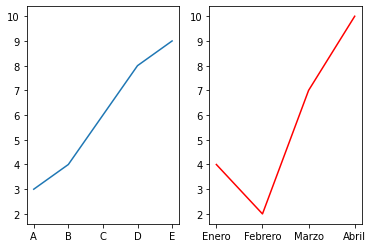

In [ ]:
# Veamos un ejemplo con datos directos
# Crearemos una figura con dos gráficos
# Creamos las gráficas en cada diagrama. Esta vez vamos a usar el subplot
datos1x, datos1y = ['A','B','C','D','E'],[3,4,6,8,9]
datos2x, datos2y = ['Enero','Febrero', 'Marzo', 'Abril'], [4,2,7,10]

fig,ax = plt.subplots(1,2)
fig.patch.set_color('white')

ejes1 = plt.subplot(1, 2, 1)
ejes1.plot(datos1x, datos1y)

ejes2 = plt.subplot(1, 2, 2, sharey=ejes1)
ejes2.plot(datos2x, datos2y, c='red');

Resultado esperado:

![Resultado](https://drive.google.com/uc?id=1rYo26ayTLgVZ0AtNrLm6Vdi36DfNrCkf)

## Ejemplo de creación de gráficas comparativas entre dos países

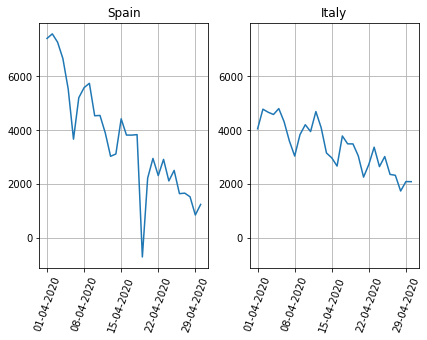

In [ ]:
# Vamos a aplicar la misma técnica a los casos de COVID-19 de España e Italia para el mes de abril de 2020
# Pero vamos a incluir algunas caracteristicas más como rotación de las etiquetas,
# etiquetas personalizadas y cuadrícula de comparación. También seleccionaremos
# y personalizaremos las ticks (marcas de los ejes)
import matplotlib.dates as mdates


datosSpain = datosCSVPF[(datosCSVPF['countriesAndTerritories'] == 'Spain') & (datosCSVPF['fecha'] >= pd.Timestamp('2020-04-01')) & (datosCSVPF['fecha'] <= pd.Timestamp('2020-04-30'))]
datosItaly = datosCSVPF[(datosCSVPF['countriesAndTerritories'] == 'Italy') & (datosCSVPF['fecha'] >= pd.Timestamp('2020-04-01')) & (datosCSVPF['fecha'] <= pd.Timestamp('2020-04-30'))]

marcas = [pd.Timestamp('2020-04-01') + i * pd.Timedelta('7d') for i in range(5)]
formatoFecha = mdates.DateFormatter('%d-%m-%Y')

fig, ax = plt.subplots(1, 2)
fig.patch.set_color('white')
fig.tight_layout()

ejes1 = plt.subplot(1, 2, 1)
ejes1.set_title('Spain')
ejes1.set_xticks(marcas)
ejes1.get_xaxis().set_major_formatter(formatoFecha)
ejes1.plot(datosSpain['fecha'], datosSpain['cases'])
plt.grid(True)
plt.xticks(rotation=70)

ejes2 = plt.subplot(1, 2, 2, sharey=ejes1)
ejes2.set_title('Italy')
ejes2.set_xticks(marcas)
ejes2.get_xaxis().set_major_formatter(formatoFecha)
ejes2.plot(datosItaly['fecha'], datosItaly['cases'])
plt.grid(True)
plt.xticks(rotation=70);

Resultado esperado:

![Resultado](https://drive.google.com/uc?id=1W0GZfvCtjcN2PjET9QcBLbpMX8SkwJd6)

## Ejemplo de comparación entre dos variables

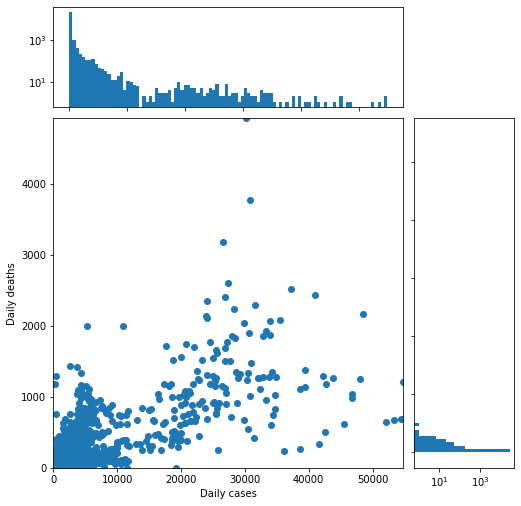

In [ ]:
# Ahora vamos a tratar de calcular las correlaciones entre el número de casos
# y fallecidos diarios. Se puede usar una solución similar desde: 
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py

x = datosCSVPF[(datosCSVPF['cases'] >= 0) & (datosCSVPF['deaths'] >= 0)]['cases']
y = datosCSVPF[(datosCSVPF['cases'] >= 0) & (datosCSVPF['deaths'] >= 0)]['deaths']

xymax = max(max(x), max(y))
xymin = min(min(x), min(y))
n = 100.0
binwidth = (xymax - xymin) / n
bins = [xymin + i * binwidth for i in range(int(n) + 1)]

fig = plt.figure(figsize=(8,8))
fig.patch.set_color('white')

gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax.scatter(x, y)
ax.set_xlabel('Daily cases')
ax.set_ylabel('Daily deaths')
plt.xlim((min(x), max(x)))
plt.ylim((min(y), max(y)))

ax_h = fig.add_subplot(gs[0, 0])
ax_h.tick_params(axis='x', labelbottom = False)
ax_h.hist(x, bins=bins)
plt.yscale('log')

ax_v = fig.add_subplot(gs[1, 1])
ax_v.tick_params(axis='y', labelleft = False)
ax_v.hist(y, bins=bins, orientation='horizontal');
plt.xscale('log')

Resutado esperado:

![Resultado](https://drive.google.com/uc?id=1pf0BUIU2A-W3yX14_isynxZn3k1YcRo8)

In [ ]:
# Vamos a realizar la comparación anterior pero por países representando el
# número de habitantes del país con el tamaño del marker del Scatter
from matplotlib.cm import Dark2
import matplotlib.patches as mpatches


Resultado esperado:

![Resultado](https://drive.google.com/uc?id=1va4VX7REOR5NEUmhmKHyaMVaAeDC8Hyf)

## Ejemplo de gráfico de cajas para mostrar valores aleatorios y relaciones entre las series de datos

In [ ]:
# Vamos a tratar de ver si hay relaciones entre las series de datos de España e 
# e Italia en valores absolutos y relativos a la población total para ello
# usaremos el boxplot


Resultado esperado:

![texto alternativo](https://drive.google.com/uc?id=1AE-5ieHmWqmoCISpDC4GIiFHD-3R2b98)

# Bokeh

Bokeh es una librería como Matplotlib para la representación de diferentes tipos de gráficas pero tiene la ventaja de ser interactiva y ser capaz de aplicarse a entornos interactivos como Web.

Página de la librería:
https://docs.bokeh.org/en/latest/index.html

Página de la API:
https://docs.bokeh.org/en/latest/docs/reference.html

Cheat sheet de Bokeh:
https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Bokeh_Cheat_Sheet.pdf

Notebooks Jupyter interactivos: 
https://hub.gke.mybinder.org/user/bokeh-bokeh-notebooks-6ue8lbbt/notebooks/tutorial/00%20-%20Introduction%20and%20Setup.ipynb


Libro sobre Bokeh:
https://buscaenbuja.ujaen.es/permalink/34CBUA_UJA/df6b9e/alma991003850015804994


## Importación de Bokeh

Por defecto, Colaboratory tiene incluida la librería Bokeh dentro de su máquina virtual, por lo que no es necesario instalarla, pero en caso de que no fuese así se pueden usar:


```
!pip install bokeh
```

Una vez creado los elementos a importar se encuentran dentro del paquete bokeh.plotting y son la **figure** y la función **show**. En el caso de que la salida no sea a un notebook Colaboratory, es necesario importar la función **output_file** para generar una salida temporal HTML del gráfico.

Sin embargo, para que se puedan visualizar los resultados en Colaboratory o en un notebook de Jupyter es necesario la importación de la salida especial para estos interfaces. En el código siguiente se configura la importación adecuada.

In [ ]:
# Importación
from bokeh.plotting import figure, show
# Importación para integración en Colaboratory
from bokeh.io import output_notebook

# Llamada para configurar la salida hacia notebook en todos los plots
# Nota: Si no hay salida a notebook sería necesario importar
# la función output_file desde bokeh.plotting y asignar un archivo temporal HTML
# de salida
output_notebook()

## Descripción general
Bokeh esta basado en el contenedor de una imagen que representa todo aquello que se puede visualizar. Para ello se usa la función **figure** que crea este contenedor básico. Este proceso es similar a lo que hemos aprendido en Matplolib.

Por otra parte Bokeh usa el concepto de Glyphs (glifos) para representar los elementos. Los glifos pueden ser lineas, círculos o incluso multipolígonos. También se pueden incluir textos y anotaciones.

Como Matplotlib usa guías y anotaciones como ejes y cuadrículas. También soporta el uso de titulos y leyendas así como que las herramientas de interactividad son configurables.

Su integración con Pandas es bastante directa porque permite la creación de objetos **ColumnSource** que se pueden incluir directamente desde los Dataframes de Pandas.

Finalmente, no hay que olvidar el concepto de rangos de representación de los datos, que aunque es algo más flexible que en Matplolib debido a la interactividad, representa el espacio visualizado al inicializar una figura.

## Primer ejemplo

In [ ]:
# Primer ejemplo básico de Bokeh, traducido de: 
# https://docs.bokeh.org/en/latest/docs/user_guide/quickstart.html#userguide-quickstart
# Recordad que es interativo

# Preparación de los datos
x, y = [1, 2, 3, 4, 5], [6, 7, 2, 4, 5]


Resultado esperado:

![Resultado](https://drive.google.com/uc?id=1NiXOdI1YaC1b7fEzrWd9QjRM2qnNjEYY)

## Bokeh para visualizar información espacial
Bokeh permite la conexión a diferentes tipos de servidores de mapas WMS, Tile providers, etc. (https://docs.bokeh.org/en/latest/docs/reference/tile_providers.html). Por ello, si disponemos de coordenadas espaciales de los elementos a representar podemos situarlos sobre un mapa que se convierte en interactivo.


Nota: Para la transformación de (longitud y latitud) a coordenadas web Mercator se deben usar las ecuaciones de Mercator que aparecen a continuación con el valor de R = 6378137):

$x(\lambda,\varphi) = R \lambda$

$y(\lambda,\varphi) = R ln \pmatrix{\frac{\pi}{4}+\frac{\varphi}{2}}$



In [ ]:
# Vamos a mostrar el número de casos totales con un círculo de color y tamaño variable
# para cada uno de los países. Los colores serán 
from bokeh.models import ColumnDataSource, LabelSet, ColorBar
from bokeh.tile_providers import get_provider, Vendors
from bokeh.palettes import Spectral6
from bokeh.transform import log_cmap
import math

def webmercator(lon, lat):
  factor = 3.141592 / 180.0
  return (
      6378137 * lon * factor,
      6378137 * math.log(math.tan(math.pi/4.0 + lat * factor / 2.0))
  )

datos = datosCSVPF[datosCSVPF['fecha'] == pd.Timestamp('2020-07-04')][['Latitude', 'Longitude', 'cases', 'countriesAndTerritories']].dropna().values
x, y = [i[1] for i in datos], [i[0] for i in datos]

res = []
xwm, ywm = [], []
for i in range(len(x)):
  res = webmercator(x[i], y[i])
  xwm.append(res[0])
  ywm.append(res[1])

n = [i[3] for i in datos]
fuente = ColumnDataSource(data=dict(x = xwm, y = ywm, nombre = n))

plot = figure(title='COVID-19', tools='pan, wheel_zoom, save, reset')

etiquetas = LabelSet(x='x', y='y', text='nombre', source=fuente)

plot.add_tile(get_provider(Vendors.CARTODBPOSITRON))

plot.add_layout(etiquetas)

plot.circle(x=xwm, y=ywm)

show(plot)


Resultado esperado:

![Resultado](https://drive.google.com/uc?id=14g7vGEQW4y9THOTRZjzY2R3RibRetc3t)

![Enlace](https://drive.google.com/uc?export=view&id=1SG6x3Jj5aX1gsOR8XESFcA_NN0KrddsR)
# Ejercicio
Elaborar una gráfica interactiva empleando Bokeh sobre alguno de los datos que estáis usando en vuestras investigaciones.

Indicar las razones de selección de la gráfica, mostrar el resultado interactivo en este notebook o exportado a una página HTML.

*Se ha utilizado un dataset devuelto por un algoritmo, mediante el cual comparamos diferentes algoritmos de clustering. He utilizado un diagrama de barra para mostrar que algoritmo es el que mejor medida de evaluación internal tiene con respecto al resto.*

In [133]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.transform import dodge
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap

datosCSV = pd.read_csv('clustering.csv')

datosCSV = datosCSV[(datosCSV.Ranking == 1)]

output_file("clustering.html")

algorithms = ['gmm','kmeans_arma','kmeans_rcpp','mini_kmeans']

gmm = datosCSV[(datosCSV.Algorithm=='gmm')].groupby('Algorithm').max()
kmeans_arma = datosCSV[(datosCSV.Algorithm=='kmeans_arma')].groupby('Algorithm').max()
kmeans_rcpp = datosCSV[(datosCSV.Algorithm=='kmeans_rcpp')].groupby('Algorithm').max()
mini_kmeans = datosCSV[(datosCSV.Algorithm=='mini_kmeans')].groupby('Algorithm').max()

counts = []

counts.append(float(gmm.dunn))
counts.append(float(kmeans_arma.dunn))
counts.append(float(kmeans_rcpp.dunn))
counts.append(float(mini_kmeans.dunn))

source = ColumnDataSource(data=dict(algorithms=algorithms, counts=counts))

p = figure(x_range=algorithms, plot_height=350, toolbar_location=None, title="Algoritmos con mejor Medida Internal")
p.vbar(x='algorithms', top='counts', width=0.9, source=source, legend_field="algorithms",
       line_color='white', fill_color=factor_cmap('algorithms', palette=Spectral6, factors=algorithms))

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 0.2
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)





Resultado esperado:

**Este ejercicio no tiene resultado esperado. Dependerá de cada uno de los alumnos.**
